In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0
...,...,...,...,...
127045,NaN,Zimbabwe,2021-04-23,38045
127046,NaN,Zimbabwe,2021-04-24,38064
127047,NaN,Zimbabwe,2021-04-25,38086
127048,NaN,Zimbabwe,2021-04-26,38102


In [9]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [10]:
global_df

,date,count
0,2020-01-22,557
1,2020-01-23,655
2,2020-01-24,941
3,2020-01-25,1433
4,2020-01-26,2118
...,...,...
457,2021-04-23,145640414
458,2021-04-24,146461651
459,2021-04-25,147189618
460,2021-04-26,147872402


In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


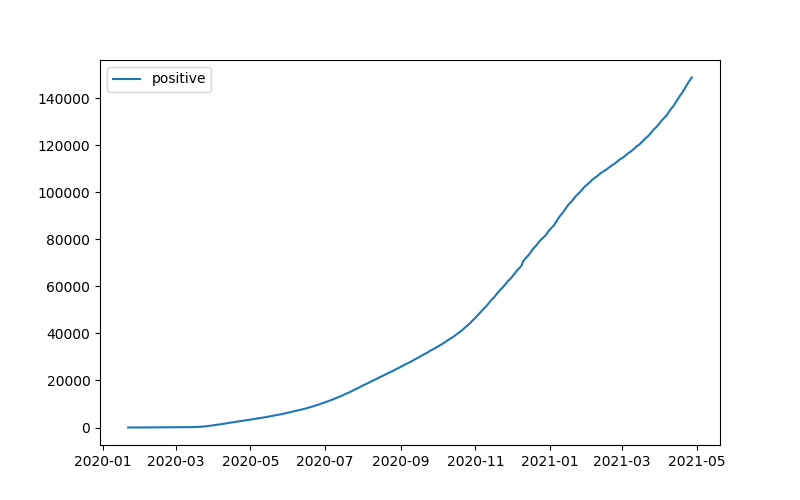

In [13]:
plt.figure(figsize=(8,5))
plt.plot_date(global_df["date"],global_df["count"]/1000,label="positive", linestyle="solid",marker="")
plt.legend()